#  We Rate Dogs Data Wrangling and Analyze

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gathering Data</a></li>
<li><a href="#access">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning</a></li>
<li><a href="#eda">Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project we will be analysing data associated with Dogs ratings. This data acquired from Twitter user @dog_rates which is also know as WeRateDogs. This twitter account is focus on rating dogs with humorous comment about the dogs been rated.

>In this projects, We will be focusing more on the wrangling processes. The gathering, accessing and cleaning of the data set.

>Interestingly, Data from this twitter account will be gathered from different source. MAnually downlaoding the data, using the url request to download the second data and using the twitter api to gather more data.
>Most real-world data rarely comes clean, so as a result the data will be access to identify where the quality and tidyness issue of the data needs to be fixed.

> Over 2000 data will be gathered, accessed and clean before analysis is  carried out


In [6]:
#import all needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json 
import os
import requests
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import re


<a id='gather'></a>
## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [7]:
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv) 

In [8]:
#create a folder for the image prediction
folder_name = 'image_preditions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [9]:
#create request using request.get
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [10]:
#accessing content and writing to a file

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)



In [11]:
#import the image prediction TSV file
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

**Reading the Json file**

In [13]:
#create an empty list
twitter_api = []

#read txt file
for line in open('tweet_json.txt', 'r'):
    twitter_data = json.loads(line)
    
    whole_source = twitter_data['source']
    only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
    source = only_device
    
    twitter_api.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count'],
                        'followers_count': twitter_data['user']['followers_count'],
                        'source': source,                 })
    

    

In [14]:
#convert into a data frame
twitter_data = pd.DataFrame(twitter_api, columns =['tweet_id', 'retweet_count', 'favorite_count', 'followers_count','source'])

In [19]:
twitter_data.head()

,tweet_id,retweet_count,favorite_count,followers_count,source
0,892420643555336193,8853,39467,3200889,Twitter for iPhone
1,892177421306343426,6514,33819,3200889,Twitter for iPhone
2,891815181378084864,4328,25461,3200889,Twitter for iPhone
3,891689557279858688,8964,42908,3200889,Twitter for iPhone
4,891327558926688256,9774,41048,3200889,Twitter for iPhone


<a id='assess'></a>
## Assessing Data


* Visual Assessment of twitter_archive file

In [15]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


**Visual Assessment of image prediction  file**

In [16]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


**Visual Assessment of twitter_api file**

In [17]:
twitter_data

,tweet_id,retweet_count,favorite_count,followers_count,source
0,892420643555336193,8853,39467,3200889,Twitter for iPhone
1,892177421306343426,6514,33819,3200889,Twitter for iPhone
2,891815181378084864,4328,25461,3200889,Twitter for iPhone
3,891689557279858688,8964,42908,3200889,Twitter for iPhone
4,891327558926688256,9774,41048,3200889,Twitter for iPhone
...,...,...,...,...,...
2349,666049248165822465,41,111,3201018,Twitter for iPhone
2350,666044226329800704,147,311,3201018,Twitter for iPhone
2351,666033412701032449,47,128,3201018,Twitter for iPhone
2352,666029285002620928,48,132,3201018,Twitter for iPhone


**Programmatic assessment**

In [18]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Checking for Duplicate**

In [19]:
twitter_archive.duplicated().sum()

0

In [20]:
twitter_archive.tweet_id.duplicated().sum()

0

**Observeing the numerator and denominator**

In [21]:
twitter_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [22]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

**Observe the data set**

In [23]:
#coincise summary of datafram
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
# open first few first data on the table 
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
# number of unique values in rating numerator column
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [26]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [27]:
twitter_archive.text.value_counts()

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                      1
Army of water dogs here. None of them know where they're going. Have no real purpose. Aggressive barks. 5/10 for all https://t.co/A88x73TwMN       1
This is Louis. He's a rollercoaster of emotions. Incalculably fluffy. 12/10 would pet firmly https://t.co/17RGvOZO9P                               1
With great pupper comes great responsibility. 12/10 https://t.co/hK6xB042EP                                                                        1
Meet Trooper &amp; Maya. Trooper protects Maya from bad things like dognappers and Comcast. So touching. 11/10 for both https://t.co/c98k1IoZKy    1
                                                                                                                                                  ..
This is Tucker. He would like a hug. 13/10 someone hug him https://t.co/wdgY9oHPrT                        

In [28]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
twitter_data.head()

,tweet_id,retweet_count,favorite_count,followers_count,source
0,892420643555336193,8853,39467,3200889,Twitter for iPhone
1,892177421306343426,6514,33819,3200889,Twitter for iPhone
2,891815181378084864,4328,25461,3200889,Twitter for iPhone
3,891689557279858688,8964,42908,3200889,Twitter for iPhone
4,891327558926688256,9774,41048,3200889,Twitter for iPhone


In [31]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
 4   source           2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


### Quality issues

#### Twitter Archive

1. Delete retweet

2. Drop columns that are not needed (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

3. datatype error in tweet_id, source, timestamp, rating numerator, denominator

4. Dog names with errors Eg. a which is not actually a dog name

5. correct numerator with decimals values. (Correct values in text)
                                    
6. name columns with missing values

7. dog stages with missing values and represented with none 

8. some dogs record include more than 1 dog stage

9. source column includes links

#### image predication table
1. image prediction table has 2075 images against 2356 

#### Twitter API Table
1. missing tweets



#### Tidiness issues
1. Doggo, floofer, pupper and puppo columns in twitter_archive table should    be merged into a single column named "dog_stage"
2. Image prediction and Twitter Api table should be merge together


<a id='cleaning'></a>
## Cleaning Data
In this section, we will be cleaning **all** of the issues  documented while assessing. 
It consist of * Define, *Code, *Test

**Making Copies of Data**

In [32]:
# Make copies of original pieces of data
df_archive_clean = twitter_archive.copy()
df_image_clean = image_prediction.copy()
df_twitter_clean = twitter_data.copy()

In [33]:
#Acessing The clean data
df_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Issue 1
#### Define:
<ul> Delete retweet with NaN </ul>

#### Code

In [34]:
 #Delete retweets by filtering the NaN of retweeted_status_user_id
df_archive_clean = df_archive_clean[pd.isnull(df_archive_clean['retweeted_status_user_id'])]

#### Test

In [35]:
#To check if retweeted with NaN is deleted
print(sum(df_archive_clean.retweeted_status_user_id.value_counts()))

0


### Issue 2:

#### Define
Drop columns that are not needed for our analysis

#### Code

In [36]:
#Drop Unwanted Column
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], axis = 1)

#### Test

In [37]:
#Display first few data to check for column dropped
df_archive_clean.head()


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Issue 3:

#### Define
Error Datatype fix for tweet_id, Source, timestamp

#### Code
**Convert Datatypes-**

In [38]:
#convert date type for tweet is, source, timestamp, rating numerator and denominator

df_archive_clean.tweet_id = df_archive_clean.tweet_id.astype(str)
df_archive_clean.source = df_archive_clean.source.astype('category')
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)
df_archive_clean[['rating_numerator', 'rating_denominator']] = df_archive_clean[['rating_numerator','rating_denominator']].astype(float)

#### Test

In [39]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), float64(2), object(7)
memory usage: 189.2+ KB


### Issue 4

#### Define
Fix Datatype for tweet_id on image prediction and twitter api

In [40]:
# convert data type for tweet id on image  prediction data
df_image_clean.tweet_id = df_image_clean.tweet_id.astype(str)

In [41]:
# convert data type for tweet id on twitter api data
df_twitter_clean.tweet_id = df_twitter_clean.tweet_id.astype(str)

#### Test

In [42]:

df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Test

In [43]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), float64(2), object(7)
memory usage: 189.2+ KB


### Issue 5

#### Define
* Fixing Name issue

In [44]:
# replace all name with single alphabet to none
df_archive_clean.name = df_archive_clean.name.str.replace('^[a-z]+', 'None')

C:\ProgramData\Anaconda3\envs\alx_class\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


#### Test

In [45]:
df_archive_clean['name'].value_counts()

None          784
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

### Issue 6

#### Define
correct numerator with decimals values. The correct values are found in the text column

#### code

In [46]:
# Disply a sample before correction
df_archive_clean[df_archive_clean.text.str.contains(r'\d+\.\d+\/\d+')][['text','rating_denominator', 'rating_numerator']].sample(3)

# convert both columns to floats
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype(float)
df_archive_clean['rating_denominator'] = df_archive_clean['rating_denominator'].astype(float)

# find columns with fractions
fraction_ratings = df_archive_clean[df_archive_clean.text.str.contains(r'\d+\.\d+\/\d+', na = False)].index

# extract correct rating and replace incorrect one
for index in fraction_ratings:
    rating = re.search('\d+\.\d+\/\d+', df_archive_clean.loc[index,:].text).group(0)
    df_archive_clean.at[index,'rating_numerator'], df_archive_clean.at[index,'rating_denominator'] = rating.split('/')


#### Test

In [47]:
#Test: display sample of fixed data
df_archive_clean.loc[fraction_ratings,:][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
1712,Here we have uncovered an entire battalion of ...,10.0,11.26
695,"This is Logan, the Chow who lived. He solemnly...",10.0,9.75
45,This is Bella. She hopes her smile made you sm...,10.0,13.50


### Issue 7

#### Define
Records with more than one stages 

#### Test

In [48]:
# creat a new column that adds all stages together
df_archive_clean['all_stages'] = df_archive_clean.doggo + df_archive_clean.floofer + df_archive_clean.puppo + df_archive_clean.pupper

In [49]:

df_archive_clean.all_stages.value_counts()

NoneNoneNoneNone        1831
NoneNoneNonepupper       224
doggoNoneNoneNone         75
NoneNonepuppoNone         24
doggoNoneNonepupper       10
NoneflooferNoneNone        9
doggoNonepuppoNone         1
doggoflooferNoneNone       1
Name: all_stages, dtype: int64

#### Define

merge all dog stages in a single column

In [50]:
# Create a function that check if each stages contain one value or more
def stages(archiveStages):
    if archiveStages['all_stages'].count('None') == 2 :   #if none appears just twices
        return 'twice'
    else:
        if archiveStages['all_stages'].count('pupper') == 1:
            return 'pupper'
        if archiveStages['all_stages'].count('doggo') == 1:
            return 'doggo'
        if archiveStages['all_stages'].count('floofer') == 1:
            return 'floofer'
        if archiveStages['all_stages'].count('puppo') == 1:
            return 'puppo'
        else:
            return 'None'
    

In [51]:
# add to my dataset a new column dog_stages
df_archive_clean['dog_stages'] = df_archive_clean.apply(stages, axis=1)

In [52]:
#check
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
 11  all_stages          2175 non-null   object             
 12  dog_stages          2175 non-null 

In [53]:
# drop previous column for stages
df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'all_stages'], axis = 1, inplace = True)

# change datatype
df_archive_clean.dog_stages = df_archive_clean.dog_stages.astype('category')

In [54]:
#check
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   dog_stages          2175 non-null   category           
dtypes: category(2), datetime64[ns, UTC](1), float64(2), object(3)
memory usage: 188.1+ KB


In [55]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Issue 8

#### Define
Extract HTML from source text

#### Code

In [56]:
#extract values
df_archive_clean.source = df_archive_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [57]:
df_archive_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [58]:
#extract values
df_archive_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   dog_stages          2175 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), float64(2), object(4)
memory usage: 202.8+ KB


In [59]:
#Source column now exist in 2 tables. drop one for twitter api data
df_twitter_clean.drop(['source'], axis=1, inplace=True)

In [60]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


### Tidiness Issue

#### Define

* merge the twitter api and image prediction table

#### Code

In [61]:
df_archive_clean = pd.merge(left = df_archive_clean, right= df_twitter_clean, how='left', on='tweet_id')
df_archive_clean = pd.merge(left = df_archive_clean, right= df_image_clean, how='left', on='tweet_id')

In [62]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   dog_stages          2175 non-null   category           
 8   retweet_count       2175 non-null   int64              
 9   favorite_count      2175 non-null   int64              
 10  followers_count     2175 non-null   int64              
 11  jpg_url             1994 non-null   object             
 12  img_num             1994 non-null 

#### Define
Some Tweets does not have image. Drop such tweets

In [63]:
df_archive_clean.dropna(axis = 0, inplace =True)

In [64]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2174
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   float64            
 5   rating_denominator  1994 non-null   float64            
 6   name                1994 non-null   object             
 7   dog_stages          1994 non-null   category           
 8   retweet_count       1994 non-null   int64              
 9   favorite_count      1994 non-null   int64              
 10  followers_count     1994 non-null   int64              
 11  jpg_url             1994 non-null   object             
 12  img_num             1994 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [65]:
df_archive_clean.to_csv('twitter_archive_master.csv', index=False)

In [66]:
# LOad the Clean Data
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [67]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   rating_numerator    1994 non-null   float64
 5   rating_denominator  1994 non-null   float64
 6   name                1994 non-null   object 
 7   dog_stages          1994 non-null   object 
 8   retweet_count       1994 non-null   int64  
 9   favorite_count      1994 non-null   int64  
 10  followers_count     1994 non-null   int64  
 11  jpg_url             1994 non-null   object 
 12  img_num             1994 non-null   float64
 13  p1                  1994 non-null   object 
 14  p1_conf             1994 non-null   float64
 15  p1_dog              1994 non-null   bool   
 16  p2    

Most of the Dataatype have been lost due to saving and reopening.

In [68]:
#Data type
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)
twitter_archive_master.dog_stages = twitter_archive_master.dog_stages.astype("category")
twitter_archive_master.source = twitter_archive_master.source.astype("category")
twitter_archive_master[['rating_numerator', 'rating_denominator']] = twitter_archive_master[['rating_numerator', 'rating_denominator']].astype(float)
twitter_archive_master[['retweet_count', 'favorite_count', 'followers_count']] = twitter_archive_master[['retweet_count', 'favorite_count', 'followers_count']].astype(int)



In [69]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   category           
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   float64            
 5   rating_denominator  1994 non-null   float64            
 6   name                1994 non-null   object             
 7   dog_stages          1994 non-null   category           
 8   retweet_count       1994 non-null   int32              
 9   favorite_count      1994 non-null   int32              
 10  followers_count     1994 non-null   int32              
 11  jpg_url             1994 non-null   object             
 12  img_num             1994 non-null 

<a id='eda'></a>
## Analyzing and Visualizing Data


Now that the data has been cleaned, we're ready to move on to exploration. we will be performing investigations on the data so as to discover patterns, test hypothesis, check assumptions with the help of Computed statistical summary and also create visualizations with the goal of addressing the research questions that will be posed. 

### Question 1: Which name is most popularly given to Dog?

In [70]:
twitter_archive_master.name.value_counts()

None          644
Charlie        11
Cooper         10
Lucy           10
Oliver         10
             ... 
Leela           1
Glenn           1
Shelby          1
Sephie          1
Christoper      1
Name: name, Length: 914, dtype: int64

In [71]:
popular_name = twitter_archive_master.name.value_counts()[1:8]

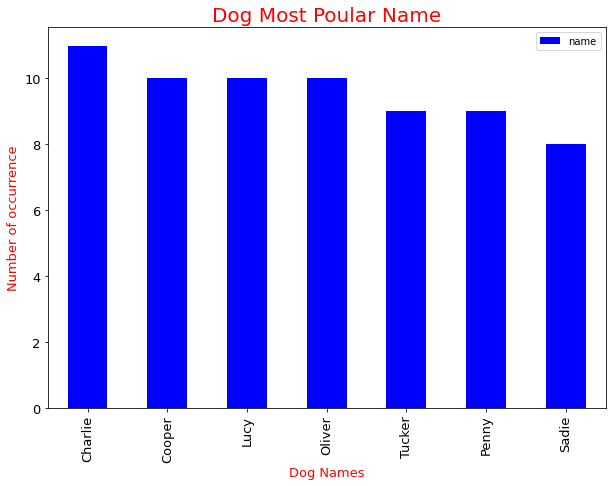

In [120]:
#plot
bar_chart = popular_name.plot.bar(color = 'blue', fontsize = 13)

#figure size(width, height)
bar_chart.figure.set_size_inches(10, 7);

#Add labels
plt.title('Dog Most Poular Name', color = 'red', fontsize = '20')
plt.xlabel('Dog Names', color = 'red', fontsize = '13')
plt.ylabel('Number of occurrence', color = 'red', fontsize = '13');
plt.legend(title="", loc="best")

The graph above shows the most common name given to dogs. It is observed that most of th name in the data set is given at none. This might be as a result of error during data entry. More than half of data names are recorded as none.

### Question 2. What Correlation is there between favourite count and retweet count.

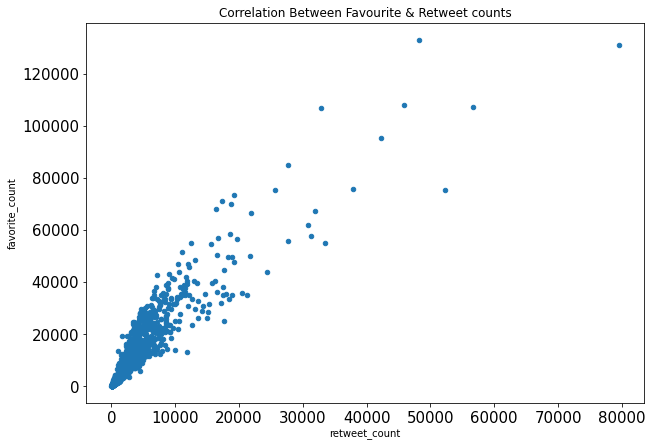

In [109]:
twitter_archive_master.plot(title="Correlation Between Favourite & Retweet counts", x="retweet_count", y="favorite_count", kind="scatter", figsize=(10,7));


The scattered plot above shows the  correlation between the favourite counts and how many times a post was retweeted. From this scattered chat, we see a positive correlation  between this two variables. The variables tend to move in the same direction that is when one variable increases, the other variable also increase.


### Question 3 What is the Most used Source for Tweet?

In [75]:
twitter_archive_master.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

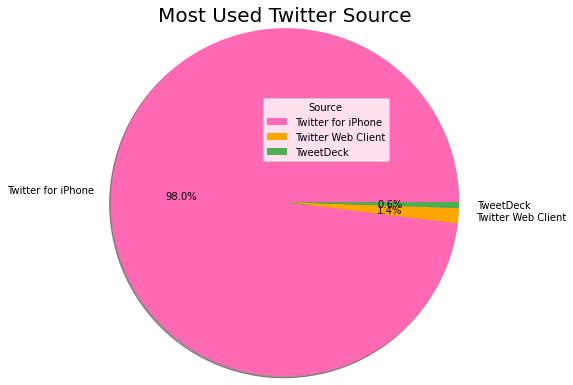

In [116]:
# Set variables for our pie chart 
labels = 'Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'
sizes = [1955, 28, 11 ]
colors = ["hotpink", 'orange', "#4CAF50"]

# piechart title and axis

plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', radius=2,shadow=True)
plt.title('Most Used Twitter Source', pad=72, fontsize = 20 )
plt.legend(title="Source", loc="best")

#plot piechart
plt.show()

The above pie chart shows that the major number of those that tweeted are Iphone users. 98 person of the tweets originate from an iphone. the remaining 2 percent are splited between the Tweet Deck and the Twitter web client.

<a id='conclusions'></a>
## Conclusion

>The three most popular dog names are:Lucy - 11 , Charlie - 10, cooper -10. Likewise, there is a positive correlation between Favorite counts and retweet counts. it has been observed that some set of data are not recorded properly. Data under the name column could have provided a more detailed information as regards the most popularly name, but over 50 percent of the name are none.

>These data set were assessed for  quality and tidiness, then cleaned to meet the standards.